In [2]:
!pip install contractions
!pip install -q sentence-transformers umap-learn hdbscan
!pip install --quiet KeyBERT
!pip install -U arrow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 106.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 68.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 44.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 99.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# IMPORT LIBRARY

In [3]:
import kagglehub
import torch
import torch.nn as nn
import torch.optim as optim
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import BertModel
from torch.utils.data import DataLoader, TensorDataset, random_split
import pandas as pd
import numpy as np
import re
import nltk
import os
import contractions
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import kagglehub
import os
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk import pos_tag
import string
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer
from transformers import get_scheduler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from google.colab import drive
from wordcloud import WordCloud, ImageColorGenerator
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import seaborn as sns
from sentence_transformers import SentenceTransformer
import umap
import hdbscan
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.cluster import KMeans
from keybert import KeyBERT
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sentence_transformers import util
from sklearn.metrics import silhouette_score
import ipywidgets as widgets
from IPython.display import display
import joblib
from google.colab import drive
drive.mount('/content/drive')


nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger_eng')

Mounted at /content/drive


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

# Read the Data

In [4]:
path = kagglehub.dataset_download("nicapotato/womens-ecommerce-clothing-reviews")
print("Path to dataset files:", path)

#read the data
file_path = os.path.join(path,"Womens Clothing E-Commerce Reviews.csv")
df = pd.read_csv(file_path, encoding="ISO-8859-1")

Path to dataset files: /kaggle/input/womens-ecommerce-clothing-reviews


In [5]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [6]:
#boş yorumlar  ve eksik veriler silinir.
df.dropna(subset=['Review Text'], inplace=True)
df.dropna(subset=['Department Name'], inplace=True)
df = df[df['Review Text'].str.strip() != ""]

stop_words = set(stopwords.words('english'))
punctuations = set(string.punctuation)
lemmatizer = WordNetLemmatizer()

In [7]:
def get_wordnet_pos(tag):
       if tag.startswith('J'):
         return wordnet.ADJ
       elif tag.startswith('V'):
         return wordnet.VERB
       elif tag.startswith('N'):
         return wordnet.NOUN
       elif tag.startswith('R'):
         return wordnet.ADV
       else:
           return wordnet.NOUN


# Clean Text



In [8]:

def clean_text(text):
       text = contractions.fix(text) #kısa kelimeleri açar don't->do not
       text = text.lower()
       # özel karakterleri temizler
       text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
       # birden fazla boşluğu tek bir boşlukla değiştirip baştaki ve sondaki boşlukları kaldırır
       text = re.sub(r'\s+', ' ', text).strip()
       words = word_tokenize(text) #cümleyi kelimelere ayırır
       words = [t for t in words if t not in stop_words and t not in punctuations and t.isalpha()]
       pos_tags = pos_tag(words)
       lemmatized = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tags]

       return " ".join(lemmatized)


df['Cleaned'] = df['Review Text'].apply(clean_text)

In [9]:
df['Cleaned'].head()

,Cleaned
0,absolutely wonderful silky sexy comfortable
1,love dress sooo pretty happen find store glad ...
2,high hope dress really wanted work initially o...
3,love love love jumpsuit fun flirty fabulous ev...
4,shirt flatter due adjustable front tie perfect...


# Class Name

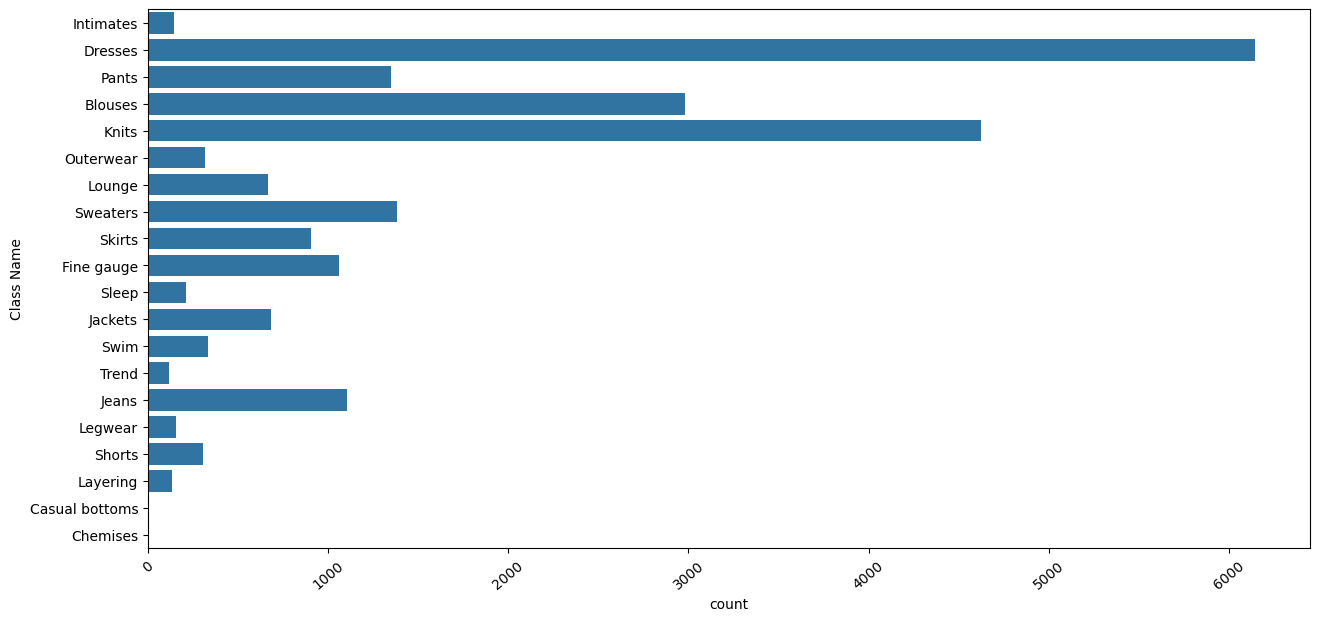

In [10]:
plt.figure(figsize = (15, 7))
sns.countplot(df['Class Name'])
plt.xticks(rotation = 40)
plt.show()

# Embedding model with SBert


In [11]:
# Embedding modeli SBert
model = SentenceTransformer('all-MiniLM-L6-v2')

# Verileri oku
texts = df['Cleaned'].tolist()
# Embedding
embeddings = model.encode(texts, show_progress_bar=True)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/708 [00:00<?, ?it/s]

In [12]:
print(embeddings)

[[-0.09583206  0.02364309  0.01497234 ... -0.00798244  0.00494182
  -0.07558217]
 [ 0.01442415  0.07699597  0.09604881 ... -0.04484927  0.01624397
   0.00185058]
 [ 0.02556067  0.07465953  0.0608601  ... -0.01865461 -0.08311438
   0.01239735]
 ...
 [-0.04165922  0.01959555  0.01124099 ... -0.02482009 -0.02257723
   0.06109603]
 [ 0.00891419  0.06921677  0.05388637 ... -0.10040558 -0.04376838
  -0.0076619 ]
 [ 0.0020253  -0.00533811  0.00738156 ... -0.06365586  0.0201378
  -0.06864087]]


# Elbow Method

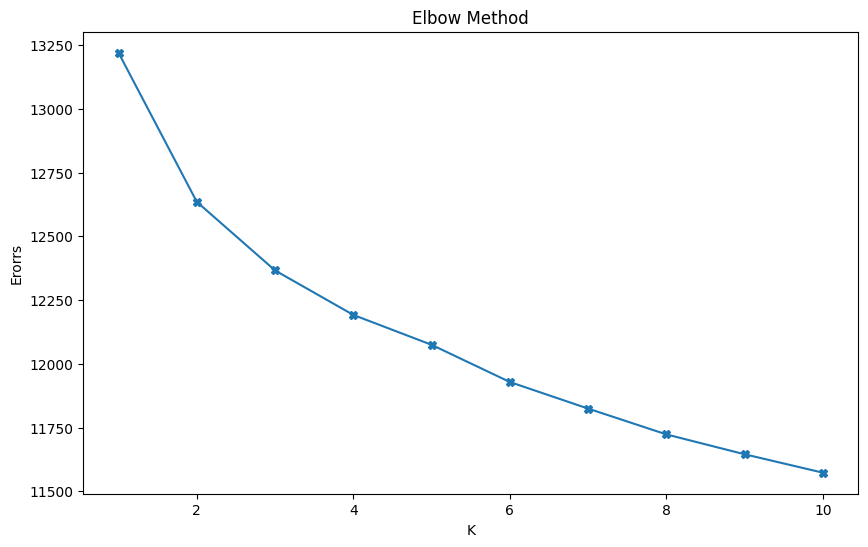

In [13]:
error = []
for k in range(1,11):
     km = KMeans(n_clusters = k)
     km.fit_predict(embeddings)
     error.append(km.inertia_)
plt.figure(figsize = (10,6))
plt.plot(list(range(1,11)), error, marker = 'X')
plt.title('Elbow Method')
plt.xlabel('K')
plt.ylabel('Erorrs')
plt.show()

#silhouette score

Silhouette Score for K = 2 is 0.04355667158961296
Silhouette Score for K = 3 is 0.019047442823648453
Silhouette Score for K = 4 is 0.019446708261966705
Silhouette Score for K = 5 is 0.02175922878086567
Silhouette Score for K = 6 is 0.021153412759304047
Silhouette Score for K = 7 is 0.009993786923587322
Silhouette Score for K = 8 is 0.012298999354243279
Silhouette Score for K = 9 is 0.016005925834178925
Silhouette Score for K = 10 is 0.01381160318851471


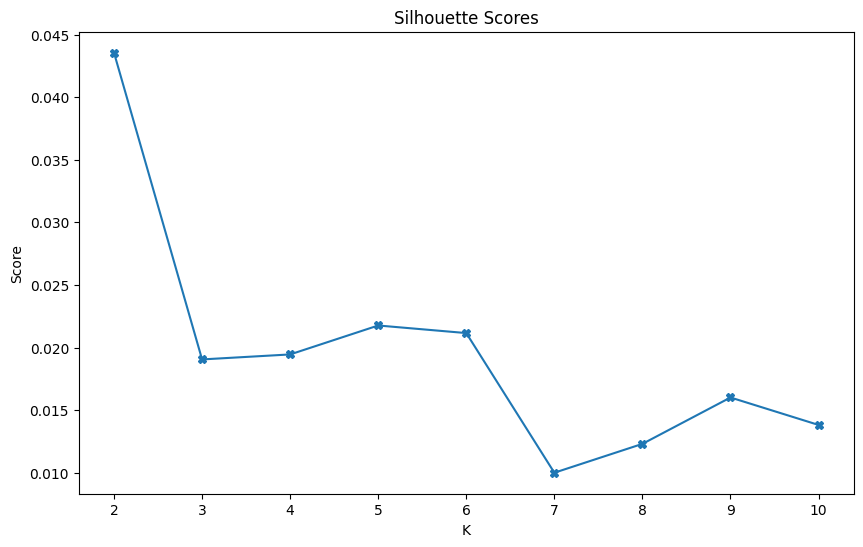

In [14]:

#kümelerin birbirinden en kadar farklı olduğunu belirler
sil_score = []
for k in range(2,11):
     km = KMeans(n_clusters = k)
     pred = km.fit_predict(embeddings)
     score = silhouette_score(embeddings, pred)
     sil_score.append(score)
     print(f'Silhouette Score for K = {k} is {score}')
plt.figure(figsize = (10,6))
plt.plot(list(range(2,11)), sil_score, marker = 'X')
plt.title('Silhouette Scores')
plt.xlabel('K')
plt.ylabel('Score')
plt.show()


# KMeans

In [15]:
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(embeddings)


In [16]:
save_path = '/content/drive/MyDrive/kmeans_model.joblib'
joblib.dump(kmeans, save_path)

['/content/drive/MyDrive/kmeans_model.joblib']

#Keyword with KeyBert

In [17]:
# 3. KeyBERT ile her küme için anahtar kelime çıkarımı
kw_model = KeyBERT(model='all-MiniLM-L6-v2')
cluster_labels = {}

In [18]:
for cluster_id in sorted(df['Cluster'].unique()):
    cluster_texts = df[df['Cluster'] == cluster_id]['Cleaned']
    combined_text = " ".join(cluster_texts.tolist())
    keywords = kw_model.extract_keywords(combined_text, keyphrase_ngram_range=(1, 3), stop_words='english', top_n=3)
    top_label = ", ".join([kw[0] for kw in keywords])
    cluster_labels[cluster_id] = top_label
    print(f"Cluster {cluster_id} → {top_label}")

Cluster 0 → slim skirt curvy, medium tuck jean, regular petite fit
Cluster 1 → style shirt flatter, flatter shirt naturally, shirt flattering fit
Cluster 2 → dress petite fit, petite fit dress, dress medium petite
Cluster 3 → pant stylish comfortable, pant fashionable alternative, fit design wool
Cluster 4 → dress purchase pretty, purchase pretty dress, retailer dress smallmed


In [19]:
# 4. Etiketleri DataFrame'e ekle
df['Predicted_Label'] = df['Cluster'].map(cluster_labels)

In [20]:
df['Predicted_Label'].head()

,Predicted_Label
0,"pant stylish comfortable, pant fashionable alt..."
1,"dress purchase pretty, purchase pretty dress, ..."
2,"dress petite fit, petite fit dress, dress medi..."
3,"dress purchase pretty, purchase pretty dress, ..."
4,"style shirt flatter, flatter shirt naturally, ..."


# Category Breakdown

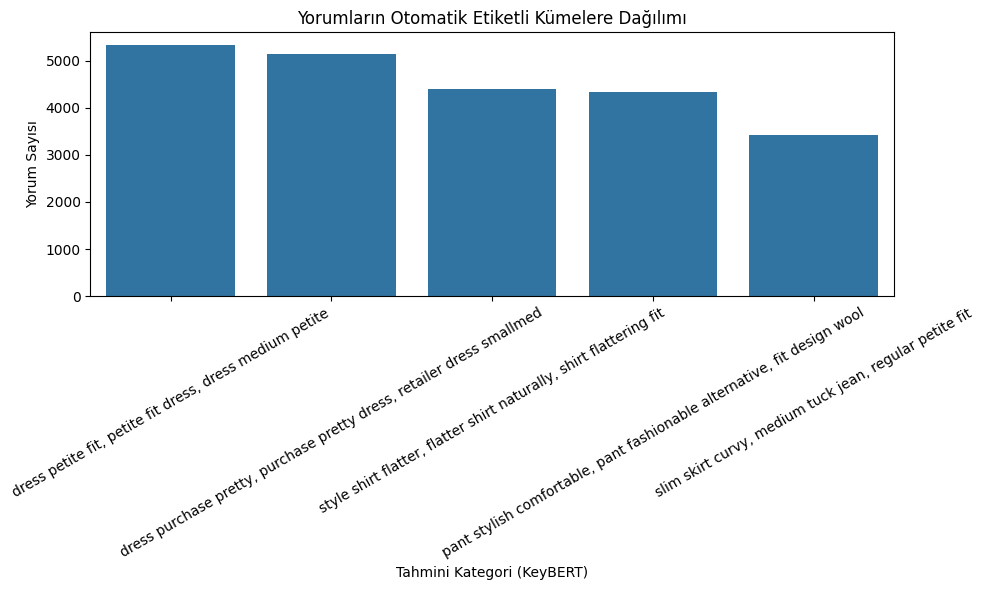

In [21]:
# 5. Kategori dağılımını çiz
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Predicted_Label', order=df['Predicted_Label'].value_counts().index)
plt.title("Yorumların Otomatik Etiketli Kümelere Dağılımı")
plt.xlabel("Tahmini Kategori (KeyBERT)")
plt.ylabel("Yorum Sayısı")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

#WordCloud

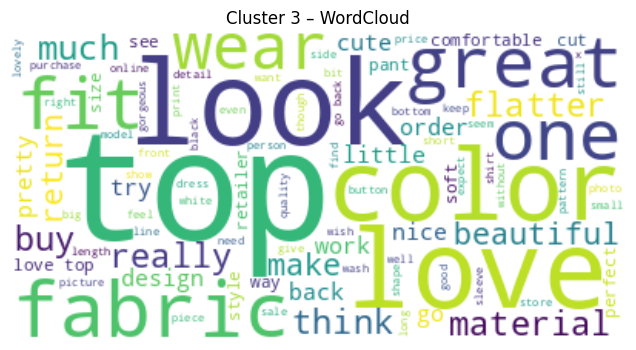

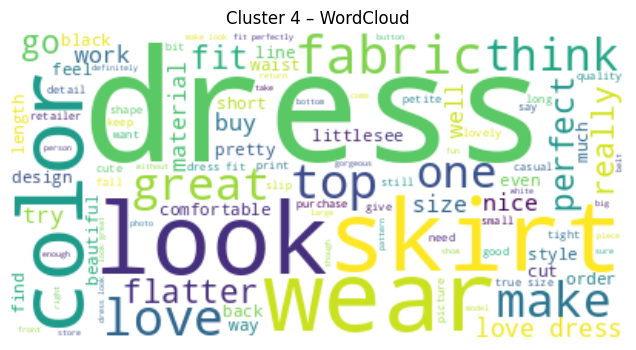

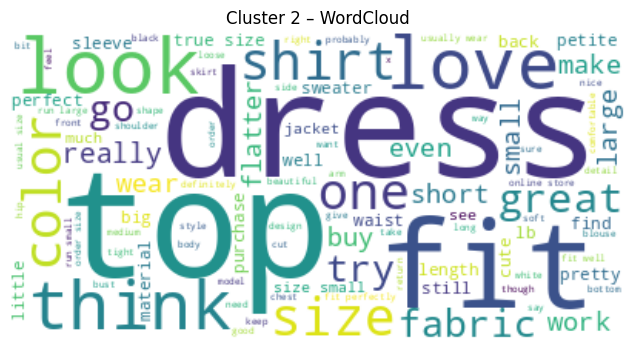

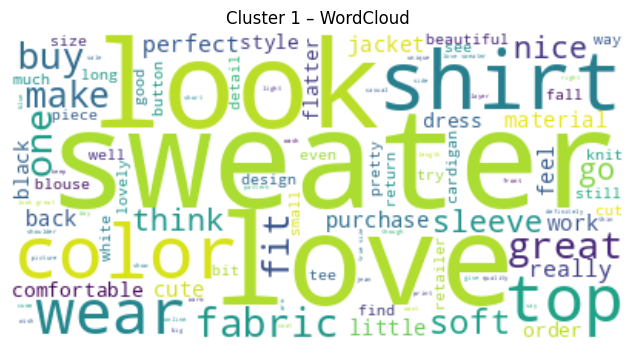

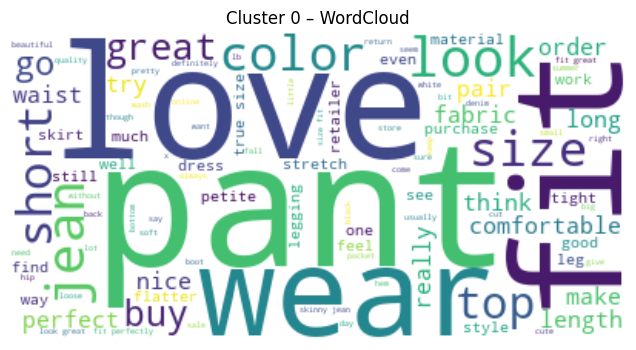

In [22]:
# 4. WordCloud – Her Kümedeki En Sık Kelimeler
for cluster_id in df['Cluster'].unique():
     cluster_texts = df[df['Cluster'] == cluster_id]['Cleaned']
     text = " ".join(cluster_texts)
     wordcloud = WordCloud(background_color='white', max_words=100).generate(text)

     plt.figure(figsize=(8, 4))
     plt.imshow(wordcloud, interpolation='bilinear')
     plt.axis('off')
     plt.title(f"Cluster {cluster_id} – WordCloud")
     plt.show()

**Class Name**

In [23]:
# 5. Class Name Dağılımı – Otomatik Sınıf Etiket Yardımı
print("\n=== Küme İçindeki En Yaygın 'Class Name' Değerleri ===")
for i in range(n_clusters):
     subset = df[df['Cluster'] == i]
     print(f"\nCluster {i} – {len(subset)} yorum")
     print(subset['Class Name'].value_counts().head())


=== Küme İçindeki En Yaygın 'Class Name' Değerleri ===

Cluster 0 – 3424 yorum
Class Name
Jeans      907
Pants      739
Knits      382
Dresses    267
Blouses    233
Name: count, dtype: int64

Cluster 1 – 4403 yorum
Class Name
Knits         1364
Sweaters       852
Blouses        603
Fine gauge     557
Dresses        247
Name: count, dtype: int64

Cluster 2 – 5335 yorum
Class Name
Dresses     1457
Knits       1324
Blouses      973
Sweaters     248
Jackets      231
Name: count, dtype: int64

Cluster 3 – 4334 yorum
Class Name
Knits         1349
Blouses        948
Dresses        460
Pants          273
Fine gauge     193
Name: count, dtype: int64

Cluster 4 – 5132 yorum
Class Name
Dresses    3714
Skirts      483
Blouses     226
Knits       207
Lounge      116
Name: count, dtype: int64


# Fully automatic clustering

In [24]:
# Gerçek class ve embed'leri
true_categories = ['Dress', 'Top', 'Knits', 'Sweater', 'Pant', 'Bottoms', 'Jeans', 'Skirts','Blouses']
category_embeddings = model.encode(true_categories)

auto_labels = {}

for cluster_id in sorted(df['Cluster'].unique()):
    # Küme temsilcisi yorumları al (5 tane)
    texts_in_cluster = df[df['Cluster'] == cluster_id]['Cleaned'].tolist()
    top_texts = texts_in_cluster[:5]  # İstersen en yakın 5 temsilciyi kullan
    rep_embeddings = model.encode(top_texts)

    # Temsilcilerin ortalama embedding'i
    avg_embedding = np.mean(rep_embeddings, axis=0)

    # Bu embedding ile tüm kategori embedding'leri arasındaki benzerliği hesapla
    sims = util.cos_sim(avg_embedding, category_embeddings).flatten()
    best_idx = sims.argmax()
    best_cat = true_categories[best_idx]

    auto_labels[cluster_id] = best_cat

# Tahmin edilen kategorileri ata
df['Auto_Category'] = df['Cluster'].map(auto_labels)




In [25]:

joblib.dump(auto_labels, 'auto_labels.joblib')


['auto_labels.joblib']

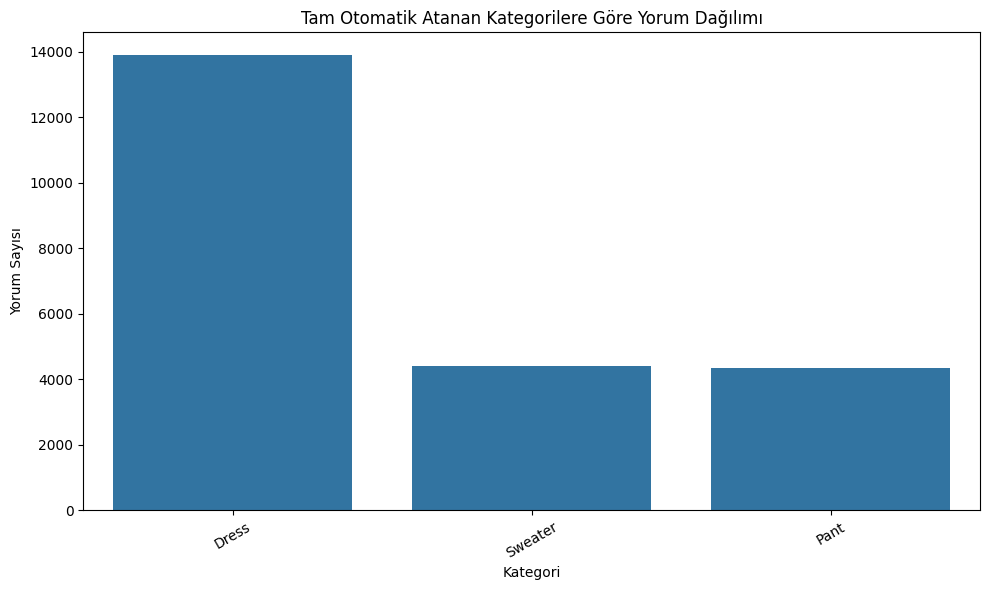

In [26]:

# Sonuç görselleştirme
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Auto_Category', order=df['Auto_Category'].value_counts().index)
plt.title("Tam Otomatik Atanan Kategorilere Göre Yorum Dağılımı")
plt.xlabel("Kategori")
plt.ylabel("Yorum Sayısı")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# Manual Clustering

In [27]:
from sentence_transformers import SentenceTransformer, util
manual_map = {
    0: "Pant",
    1: "Sweater",
    2: "Dress",
    3: "Top",
    4: "Skirt"
}
df['Manual_Category'] = df['Cluster'].map(manual_map)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Dress'),
  Text(1, 0, 'Skirt'),
  Text(2, 0, 'Sweater'),
  Text(3, 0, 'Top'),
  Text(4, 0, 'Pant')])

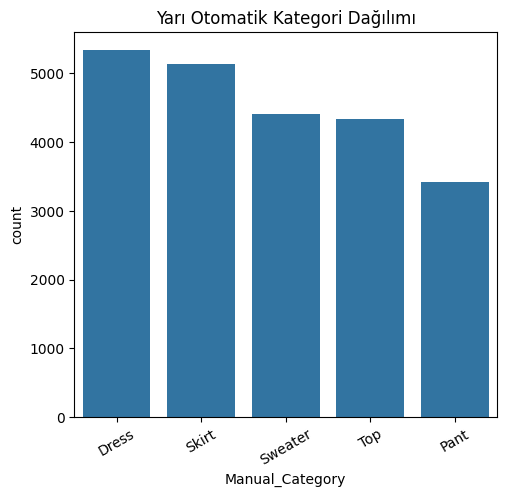

In [28]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Manual_Category', order=df['Manual_Category'].value_counts().index)
plt.title("Yarı Otomatik Kategori Dağılımı")
plt.xticks(rotation=30)


# Test Manual

In [29]:

# Text girişi ve buton tanımı
text_input = widgets.Text(
     value='',
     placeholder='Yorumunuzu buraya yazın...',
     description='Yorum:',
     layout=widgets.Layout(width='600px')
)
button = widgets.Button(description="Tahmin Et", button_style='success')
output = widgets.Output()

manual_map = {
    0: "Pant",
    1: "Sweater",
    2: "Dress",
    3: "Top",
    4: "Skirt"
}

# Tahmin fonksiyonu
def predict_cluster(b):
     output.clear_output()
     with output:
         new_text = text_input.value
         if not new_text.strip():
             print("Lütfen bir yorum girin.")
             return

         cleaned = clean_text(new_text)
         embedding = model.encode([cleaned])
         cluster = kmeans.predict(embedding)[0]
         label = manual_map.get(cluster, "Bilinmeyen")

         print(f"Tahmin Edilen Sınıf: {label} (Küme {cluster})")

# Butona tıklanınca tahmin fonksiyonu çalışır
button.on_click(predict_cluster)

# Arayüzü göster
display(text_input, button, output)

Text(value='', description='Yorum:', layout=Layout(width='600px'), placeholder='Yorumunuzu buraya yazın...')

Button(button_style='success', description='Tahmin Et', style=ButtonStyle())

Output()